In [1]:
import pandas as pd

df = pd.read_csv('output.csv')

In [ ]:
### FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/BT4012 Project/output.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,...,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,...,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,4,1794,15400,30,18,91.0,0,1,0.21,0


In [4]:
df.shape

(3585, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

1. Clustering (All Data)
2. Binning (All Data)
3. SMOTE (Train Data)
4. Scale

In [6]:
#Check for NA values
df.isnull().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

# Exploratory Data Analysis (EDA)

Balance Labels by sampling smote

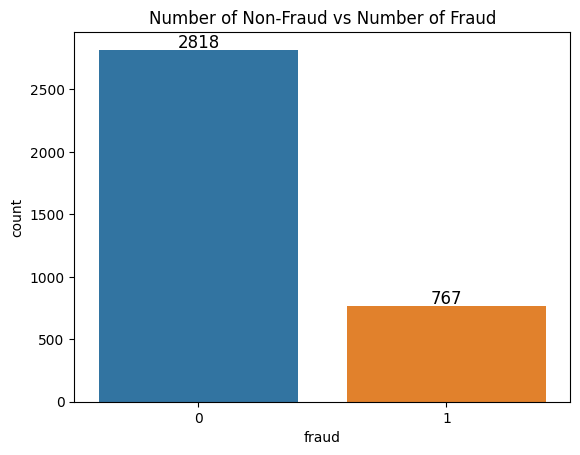

In [7]:
ax = sns.countplot(x='fraud', data=df)

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Number of Non-Fraud vs Number of Fraud")

# Show the plot
plt.show()

In [8]:
print("Unique values in feature:")
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

Unique values in feature:
host_response_rate - 52
host_identity_verified - 2
host_total_listings_count - 35
city - 38
is_location_exact - 2
property_type - 13
room_type - 3
accommodates - 14
bathrooms - 12
bedrooms - 6
beds - 11
bed_type - 5
amenities - 3092
price - 324
minimum_nights - 29
number_of_reviews - 178
review_scores_rating - 48
instant_bookable - 2
cancellation_policy - 4
reviews_per_month - 644
fraud - 2


Text(0.5, 1.0, 'Cities Distribution')

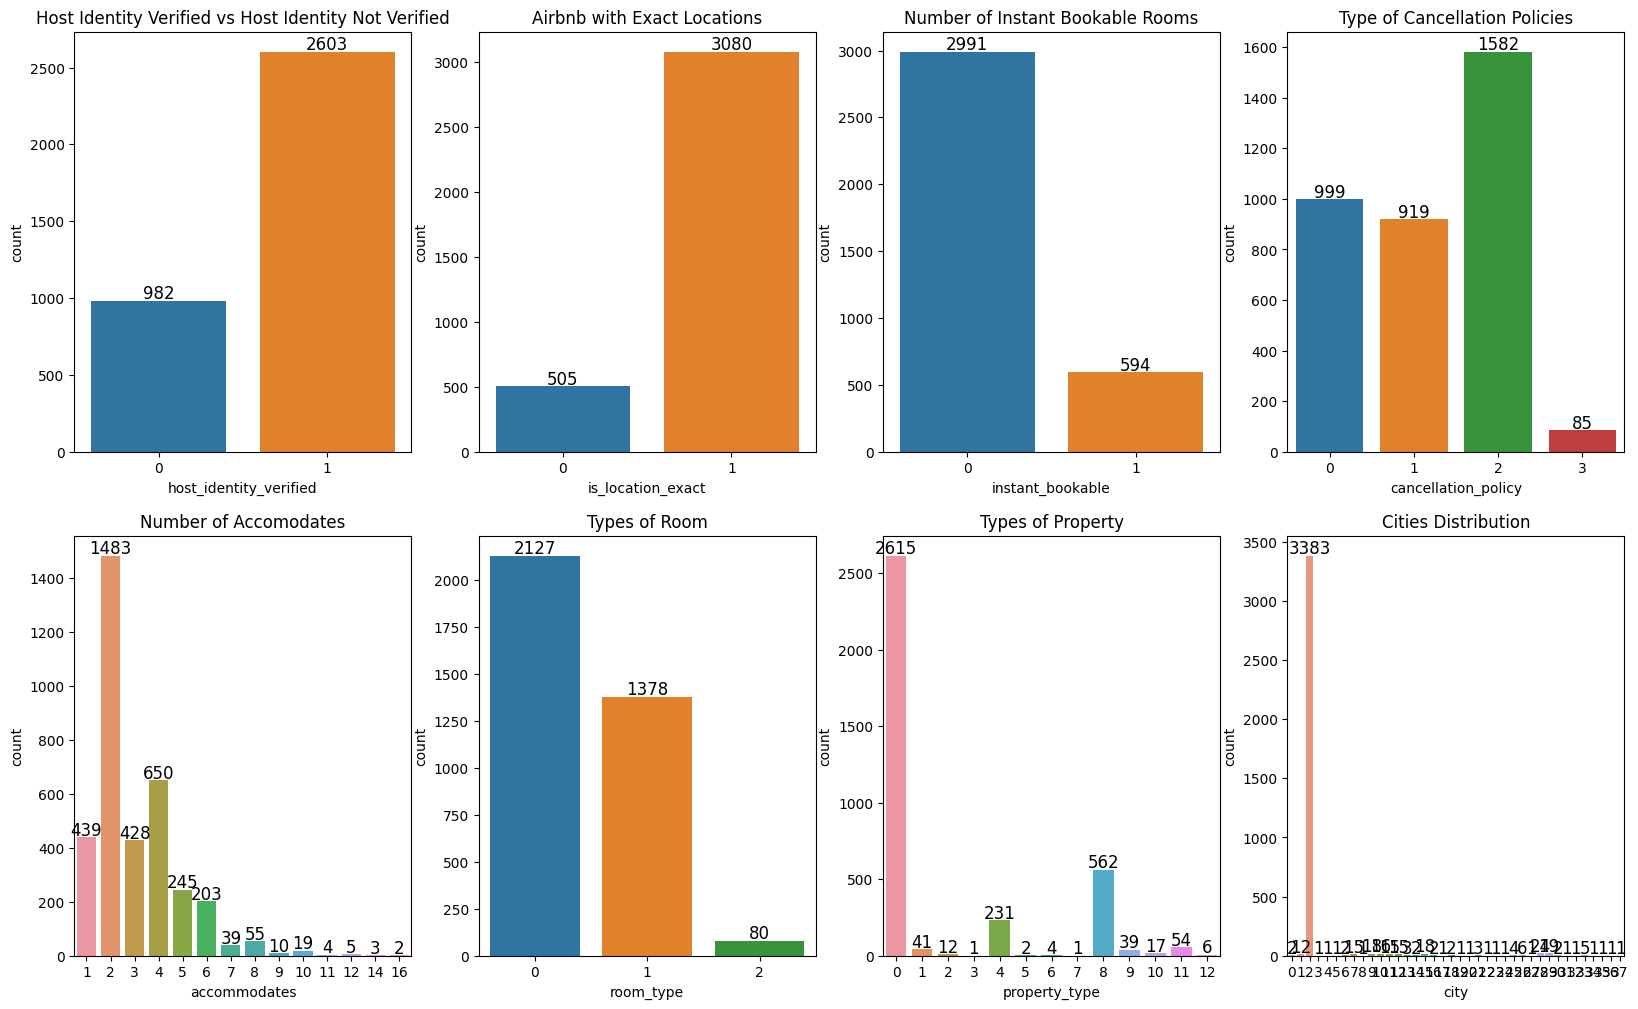

In [9]:
#Visual Distribution of meaningful categorical features
plt.figure(figsize = [20,12])

#Host Identity Verification
plt.subplot(241)
ax = sns.countplot(x='host_identity_verified', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Host Identity Verified vs Host Identity Not Verified")

#Room Type
plt.subplot(242)
ax = sns.countplot(x='is_location_exact', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Airbnb with Exact Locations")

#Instant Bookable
plt.subplot(243)
ax = sns.countplot(x='instant_bookable', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of Instant Bookable Rooms")

#Cancellation Policies
plt.subplot(244)
ax = sns.countplot(x='cancellation_policy', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Type of Cancellation Policies")

#accommodates
plt.subplot(245)
ax = sns.countplot(x='accommodates', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of Accomodates")

#room_type
plt.subplot(246)
ax = sns.countplot(x='room_type', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Types of Room")

#property_type
plt.subplot(247)
ax = sns.countplot(x='property_type', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Types of Property")

#city
plt.subplot(248)
ax = sns.countplot(x='city', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Cities Distribution")

<Axes: title={'center': 'City vs Fraud'}, xlabel='city', ylabel='Density'>

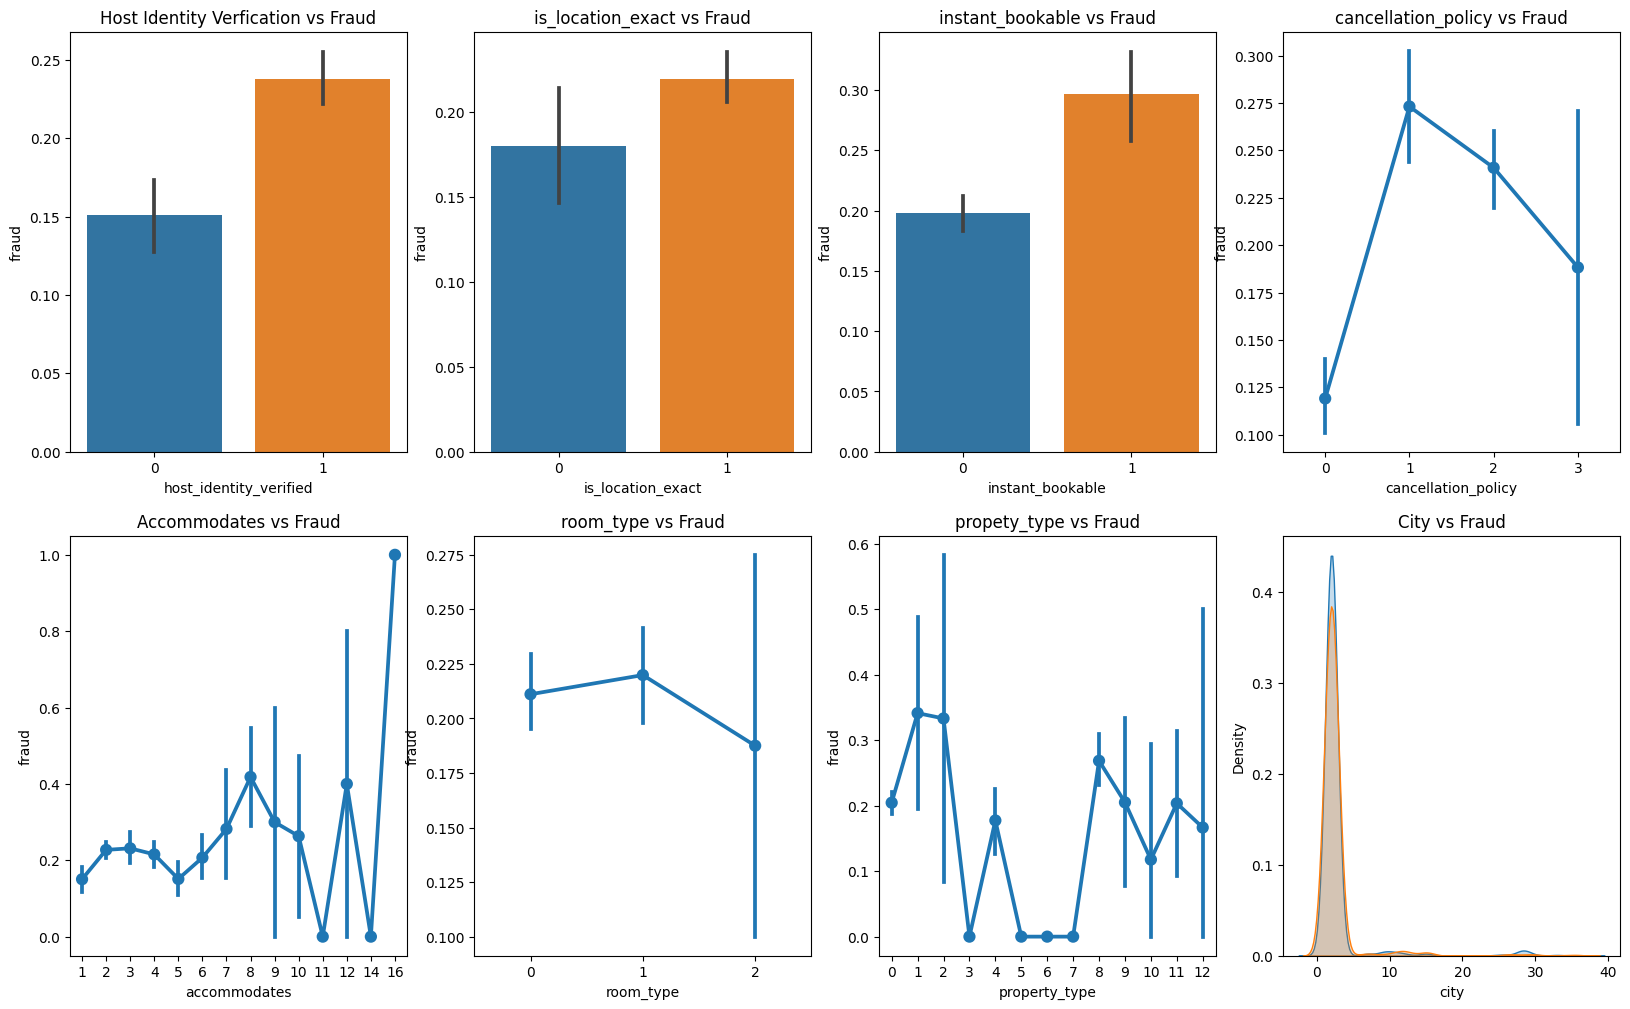

In [10]:
fig, saxis = plt.subplots(2,4, figsize = (20, 12))
sns.barplot(x = "host_identity_verified", y ="fraud", data=df, ax = saxis[0,0]).set(title = "Host Identity Verfication vs Fraud")

sns.barplot(x = "is_location_exact", y ="fraud", data=df, ax = saxis[0,1]).set(title = "is_location_exact vs Fraud")

sns.barplot(x = "instant_bookable", y ="fraud", data=df, ax = saxis[0,2]).set(title = "instant_bookable vs Fraud")

sns.pointplot(x = 'cancellation_policy', y = 'fraud',  data=df, ax = saxis[0,3]).set(title = "cancellation_policy vs Fraud")

sns.pointplot(x = 'accommodates', y = 'fraud',  data=df, ax = saxis[1,0]).set(title = "Accommodates vs Fraud")

sns.pointplot(x = 'room_type', y = 'fraud', data=df, ax = saxis[1,1]).set(title = "room_type vs Fraud")

sns.pointplot(x = 'property_type', y = 'fraud', data=df, ax = saxis[1,2]).set(title = "propety_type vs Fraud")

sns.kdeplot(df[df['fraud'] == 0]['city'], ax = saxis[1,3], label='No Fraud', shade=True).set(title = "City vs Fraud")
sns.kdeplot(df[df['fraud'] == 1]['city'], ax= saxis[1,3], label='Fraud', shade=True)

Text(0, 0.5, '# Airbnb Listings')

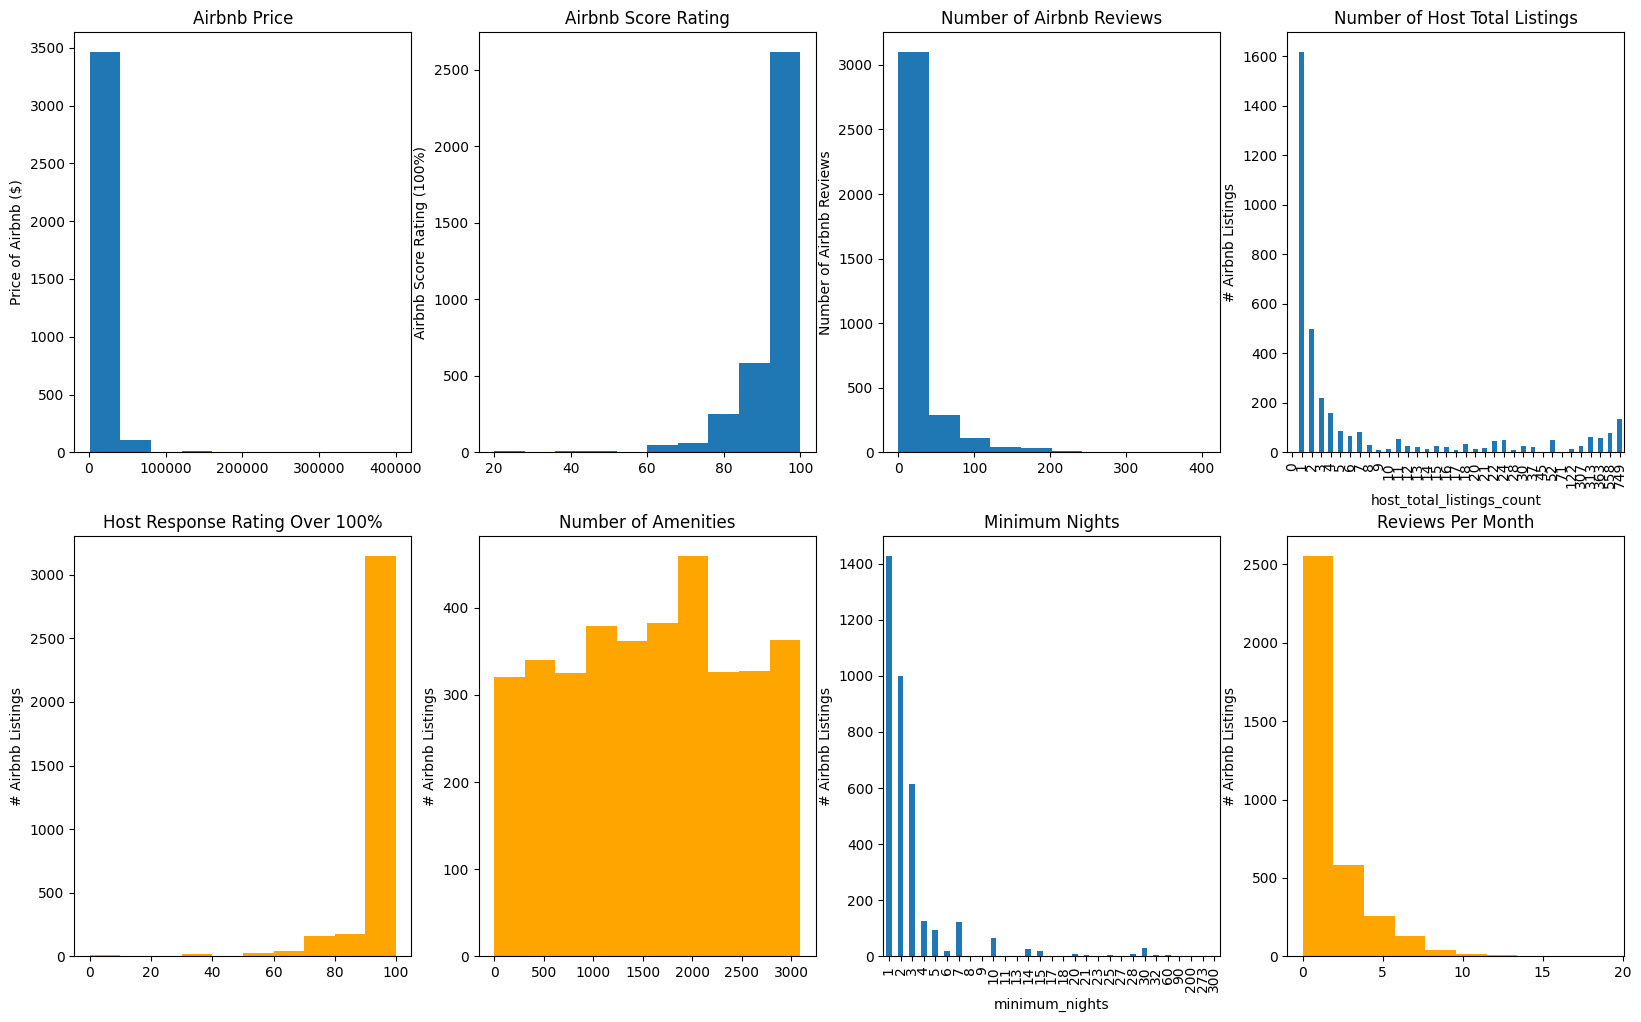

In [11]:
#Visual Distribution of meaningful features
plt.figure(figsize = [20,12])

#Airbnb Price
plt.subplot(241)
# plt.boxplot(x=df['price'], showmeans = True, meanline = True)
plt.hist(x = df['price'])
plt.title('Airbnb Price')
plt.ylabel('Price of Airbnb ($)')

#Review Score Rating
plt.subplot(242)
plt.hist(x = df['review_scores_rating'])
plt.title('Airbnb Score Rating')
plt.ylabel('Airbnb Score Rating (100%)')

#Number of reviews
plt.subplot(243)
plt.hist(x = df['number_of_reviews'])
# plt.boxplot(x=df['number_of_reviews'], showmeans = True, meanline = True)
plt.title('Number of Airbnb Reviews')
plt.ylabel('Number of Airbnb Reviews')

#Total of host_total_listings_count
plt.subplot(244)
df['host_total_listings_count'].value_counts().sort_index().plot(kind = "bar")
plt.title('Number of Host Total Listings')
plt.ylabel('# Airbnb Listings')

#Host Response Rate
plt.subplot(245)
plt.hist(x = df['host_response_rate'], color = "orange")
plt.title('Host Response Rating Over 100%')
plt.ylabel('# Airbnb Listings')

#Amenities
plt.subplot(246)
plt.hist(x = df['amenities'], color = "orange")
plt.title('Number of Amenities')
plt.ylabel('# Airbnb Listings')

#Minimum Nights
plt.subplot(247)
df['minimum_nights'].value_counts().sort_index().plot(kind = "bar")
# plt.boxplot(x = df['minimum_nights'])
plt.title('Minimum Nights')
plt.ylabel('# Airbnb Listings')

#Reviews Per Month
plt.subplot(248)
plt.hist(x = df['reviews_per_month'], color = "orange")
plt.title('Reviews Per Month')
plt.ylabel('# Airbnb Listings')

Text(0.5, 0, 'Fraud')

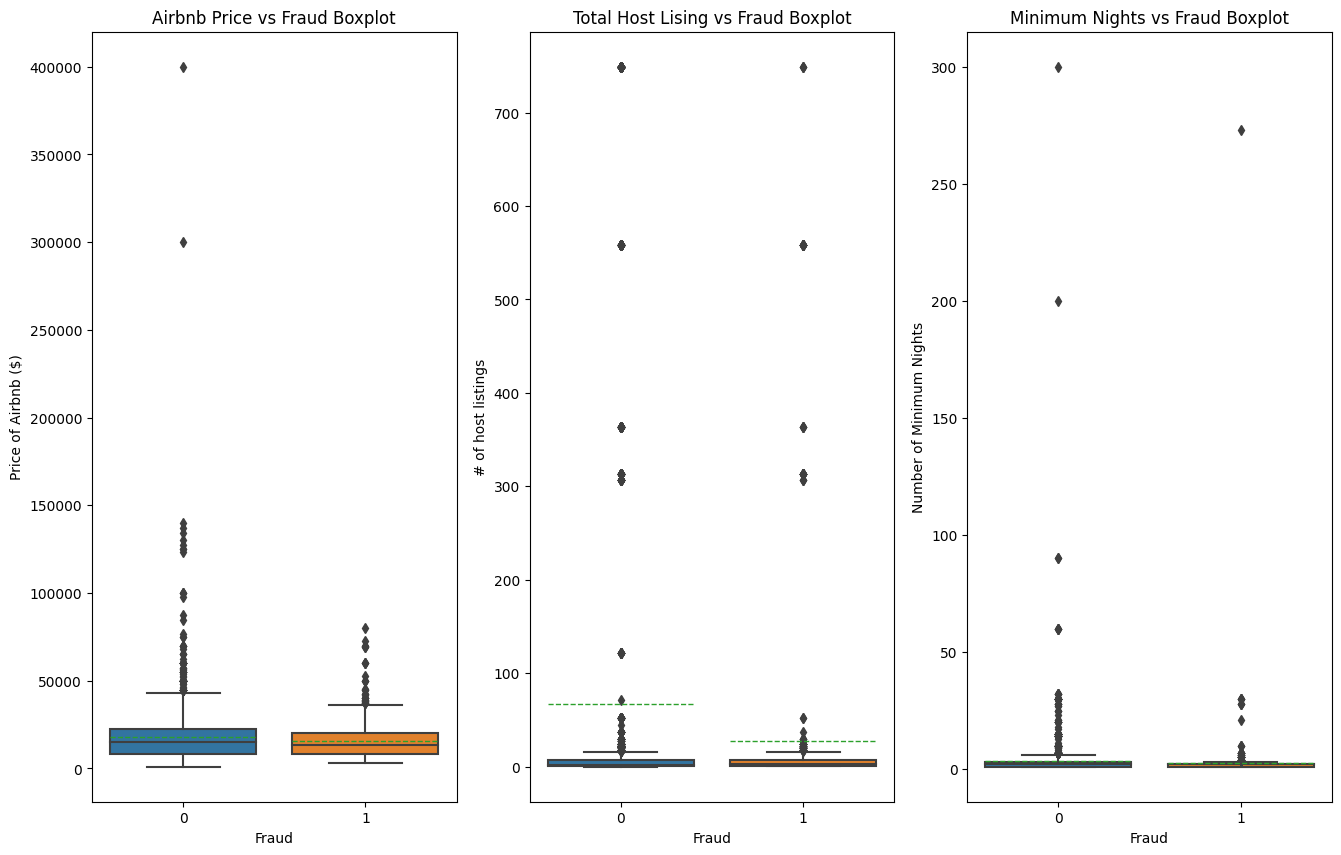

In [12]:
#Continuous Features vs Fraud
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,10))

plt.subplot(131)
sns.boxplot(x = 'fraud', y = 'price', data=df, showmeans=True, meanline=True)
plt.title('Airbnb Price vs Fraud Boxplot')
plt.ylabel('Price of Airbnb ($)')
plt.xlabel('Fraud')

plt.subplot(132)
sns.boxplot(x = 'fraud', y = 'host_total_listings_count', data=df, showmeans=True, meanline=True)
plt.title('Total Host Lising vs Fraud Boxplot')
plt.ylabel('# of host listings')
plt.xlabel('Fraud')

plt.subplot(133)
sns.boxplot(x = 'fraud', y = 'minimum_nights', data=df, showmeans=True, meanline=True)
plt.title('Minimum Nights vs Fraud Boxplot')
plt.ylabel('Number of Minimum Nights')
plt.xlabel('Fraud')

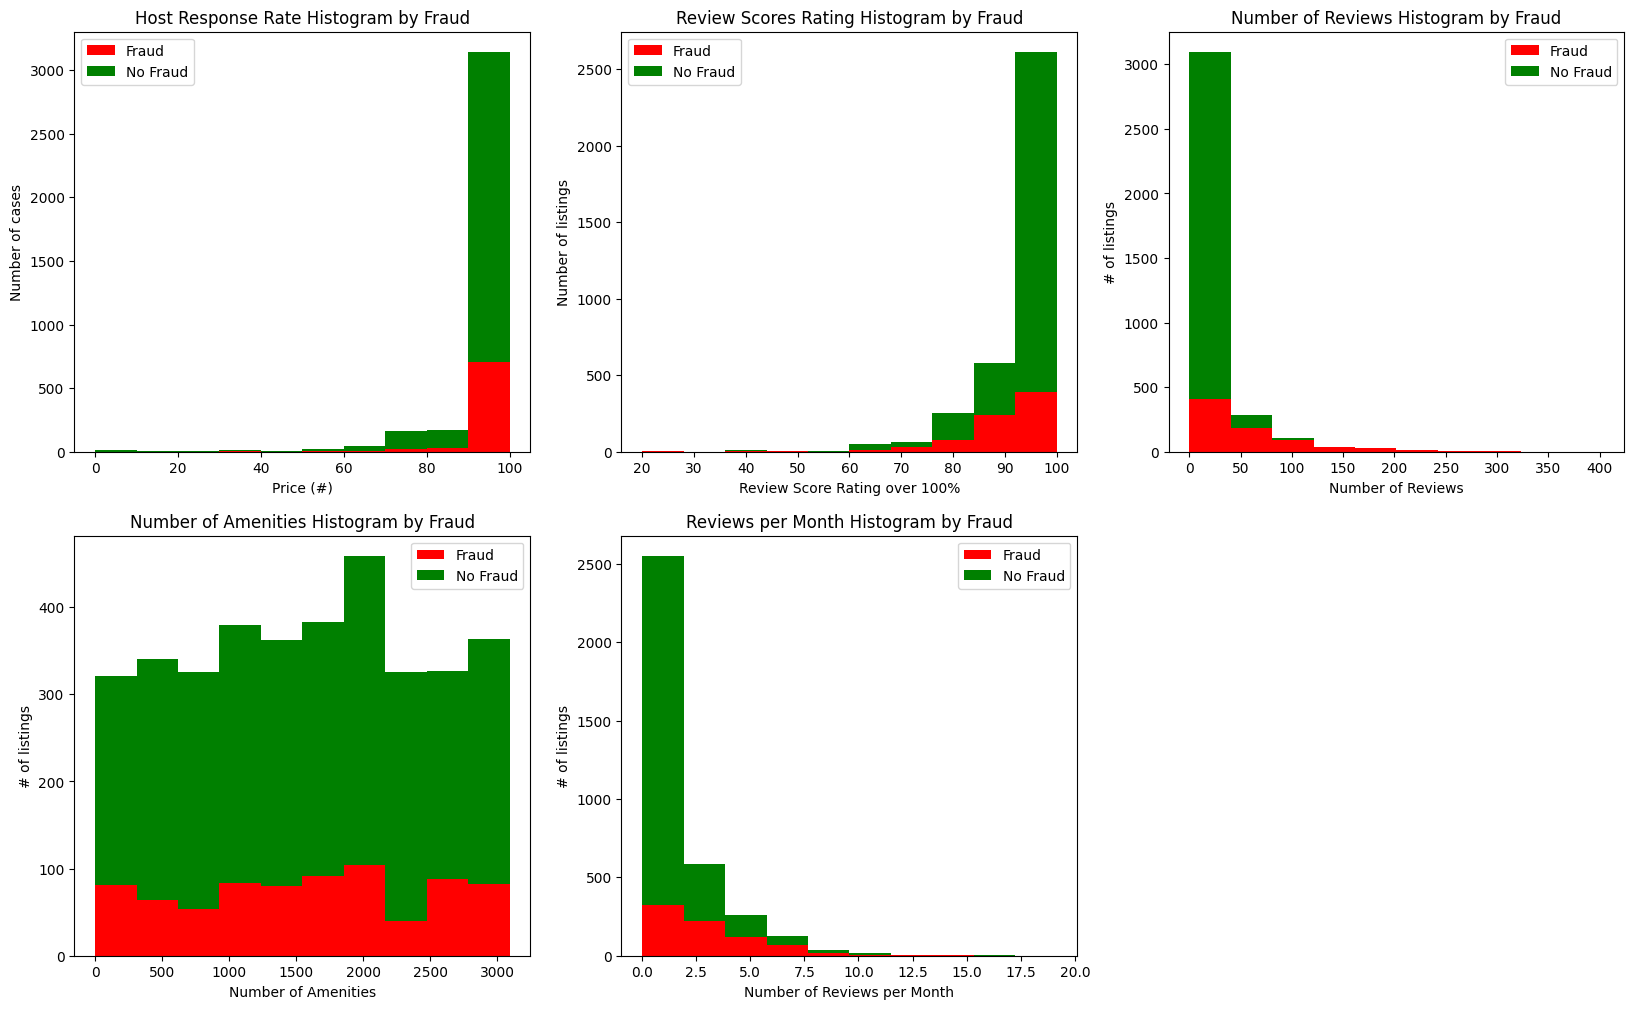

In [13]:
plt.figure(figsize = [20,12])
#Host Response Rate Histogram By Fraud
plt.subplot(231)
plt.hist(x= [df[df["fraud"] == 1]["host_response_rate"], df[df["fraud"] == 0]["host_response_rate"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Host Response Rate Histogram by Fraud')
plt.xlabel('Price (#)')
plt.ylabel('Number of cases')
plt.legend()

#Score Rating Histogram By Fraud
plt.subplot(232)
plt.hist(x= [df[df["fraud"] == 1]["review_scores_rating"], df[df["fraud"] == 0]["review_scores_rating"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Review Scores Rating Histogram by Fraud')
plt.xlabel('Review Score Rating over 100%')
plt.ylabel('Number of listings')
plt.legend()

#Airbnb Reviews Per Month Histogram By Fraud
plt.subplot(233)
plt.hist(x= [df[df["fraud"] == 1]["number_of_reviews"], df[df["fraud"] == 0]["number_of_reviews"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Number of Reviews Histogram by Fraud')
plt.xlabel('Number of Reviews')
plt.ylabel('# of listings')
plt.legend()

#Number of Amenities Histogram By Fraud
plt.subplot(234)
plt.hist(x= [df[df["fraud"] == 1]["amenities"], df[df["fraud"] == 0]["amenities"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Number of Amenities Histogram by Fraud')
plt.xlabel('Number of Amenities')
plt.ylabel('# of listings')
plt.legend()

#Number of Reviews Per Month Histogram By Fraud
plt.subplot(235)
plt.hist(x= [df[df["fraud"] == 1]["reviews_per_month"], df[df["fraud"] == 0]["reviews_per_month"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Reviews per Month Histogram by Fraud')
plt.xlabel('Number of Reviews per Month')
plt.ylabel('# of listings')
plt.legend()

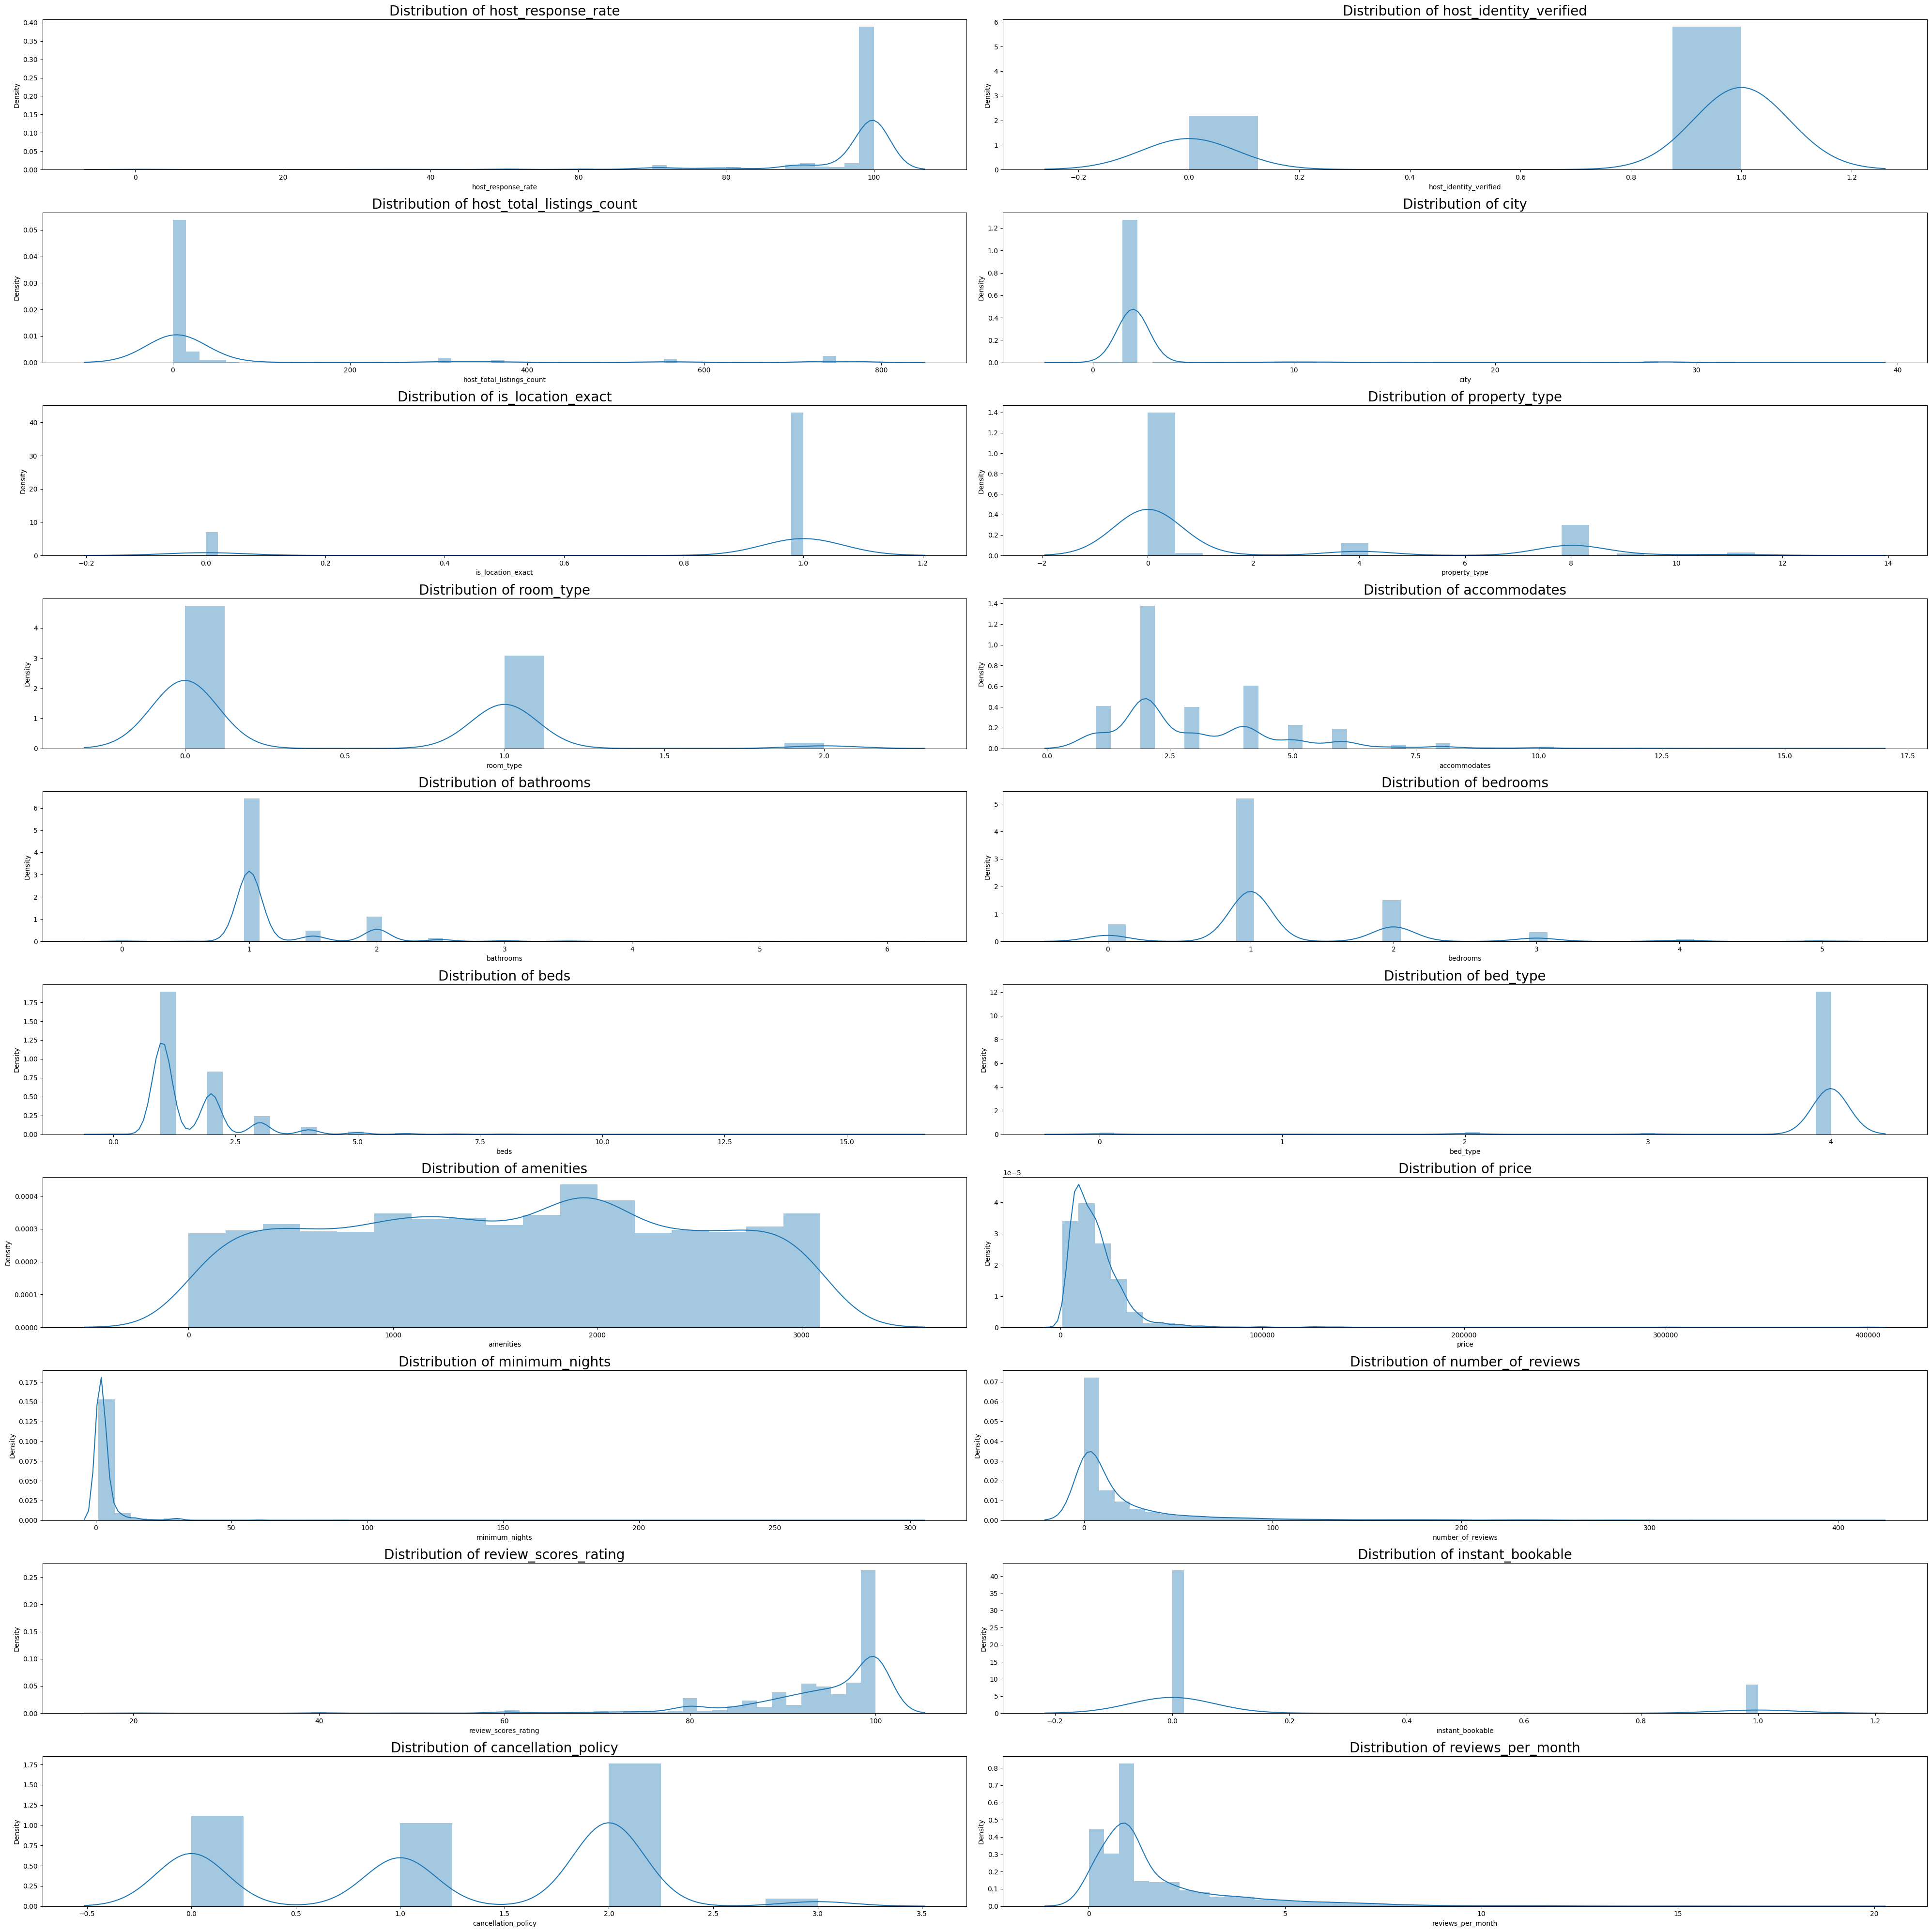

In [14]:
# Visualise distribution of each feature
fig, axes = plt.subplots(nrows=10, ncols=2)
axes = axes.flatten()
fig.set_size_inches(40, 40)

for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax=ax)
    ax.set_title("Distribution of "+col, fontsize=20)  # Adjust the fontsize as needed
plt.tight_layout()
plt.show()

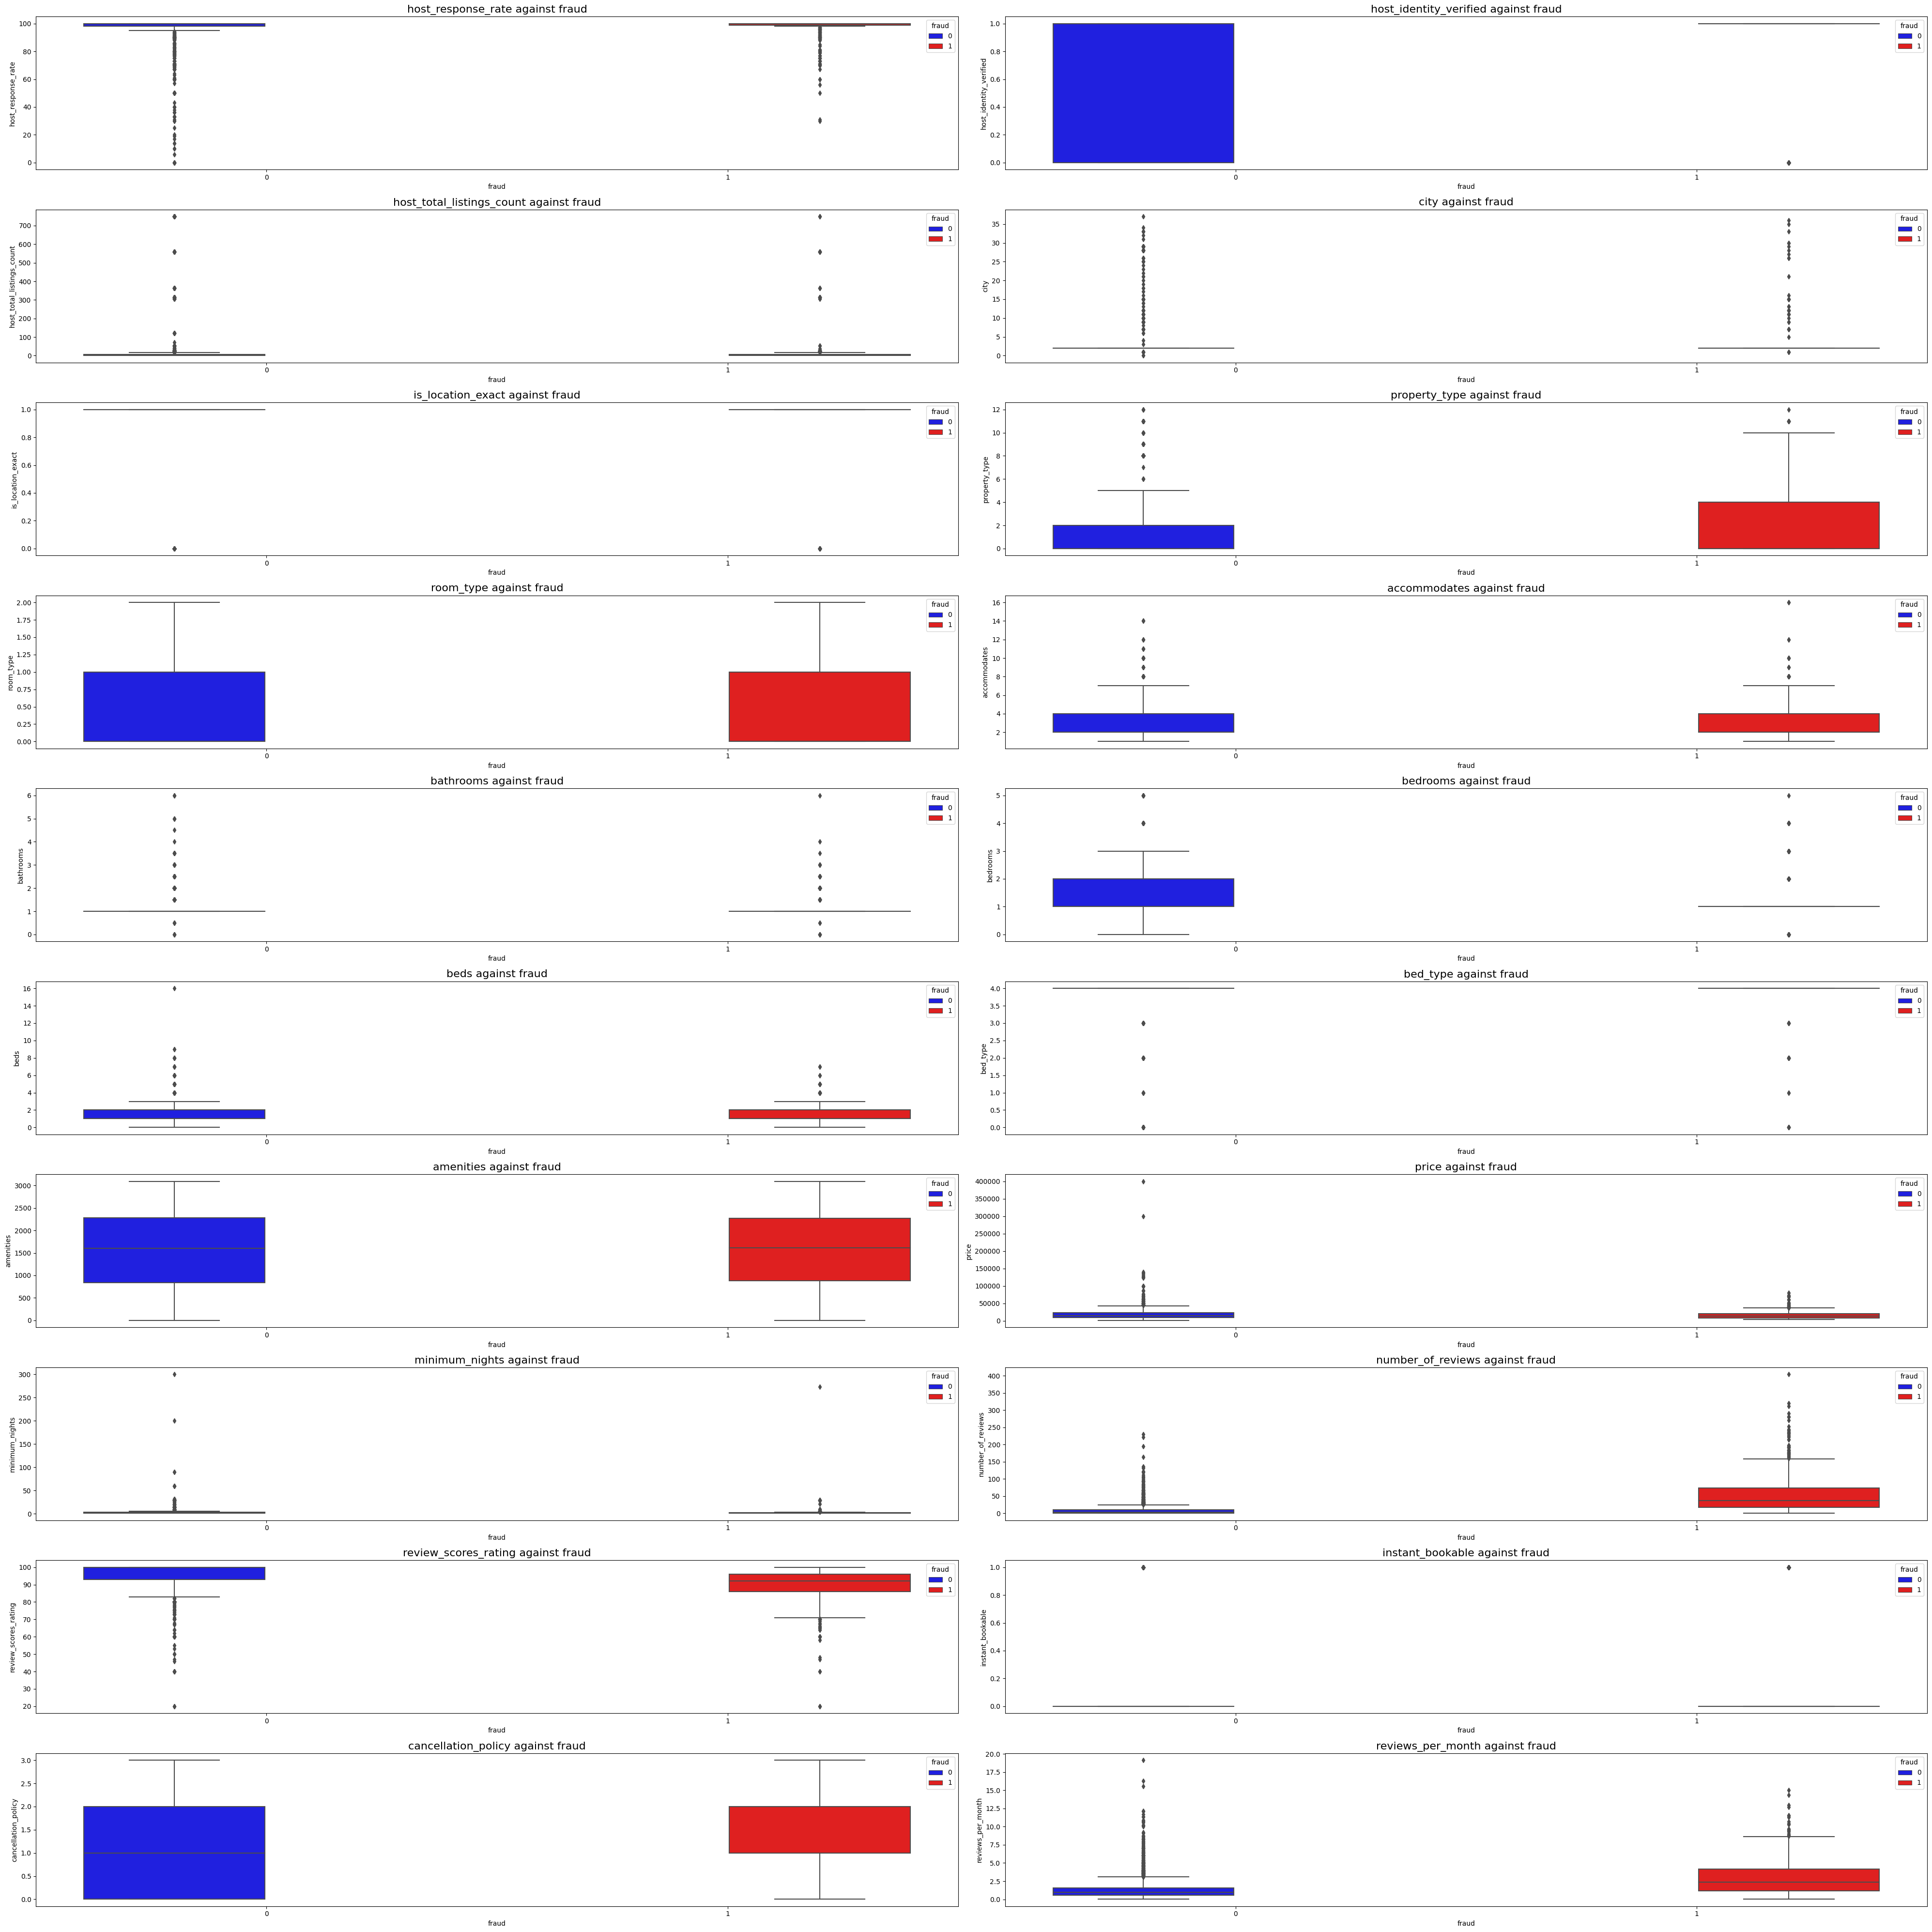

In [15]:
# Visualise distribution of each feature against 'fraud'
fig, axes = plt.subplots(nrows=10, ncols=2)
axes = axes.flatten()
fig.set_size_inches(40, 40)

for ax, col in zip(axes, df.columns):
    sns.boxplot(x='fraud', y=df[col], ax=ax, hue='fraud', data=df, palette={0: 'blue', 1: 'red'})
    ax.set_title(col + " against fraud", fontsize=16)  # Adjust the fontsize as needed

plt.tight_layout()
plt.show()

Skewdness check for each feature value

In [16]:
#Check for skewdness value for each value
from scipy.stats import skew

In [17]:
for feat in df.columns:
    feat_skew = skew(df[feat], axis=0, bias=True)
    skewness = ""
    if feat_skew > 1 or feat_skew < -1:
      skewness = "Highly Skewed"
    elif feat_skew < 0.5 and feat_skew > -0.5:
      skewness = "Symmetric"
    else:
      skewness = "Moderate Skewed"

    print(f"{feat}'s skewness value is {feat_skew:.2f} and {skewness}")

host_response_rate's skewness value is -4.47 and Highly Skewed
host_identity_verified's skewness value is -1.01 and Highly Skewed
host_total_listings_count's skewness value is 3.17 and Highly Skewed
city's skewness value is 5.61 and Highly Skewed
is_location_exact's skewness value is -2.06 and Highly Skewed
property_type's skewness value is 1.40 and Highly Skewed
room_type's skewness value is 0.71 and Moderate Skewed
accommodates's skewness value is 1.68 and Highly Skewed
bathrooms's skewness value is 3.05 and Highly Skewed
bedrooms's skewness value is 1.49 and Highly Skewed
beds's skewness value is 3.05 and Highly Skewed
bed_type's skewness value is -6.30 and Highly Skewed
amenities's skewness value is -0.03 and Symmetric
price's skewness value is 8.52 and Highly Skewed
minimum_nights's skewness value is 22.54 and Highly Skewed
number_of_reviews's skewness value is 3.79 and Highly Skewed
review_scores_rating's skewness value is -2.88 and Highly Skewed
instant_bookable's skewness value

<Axes: >

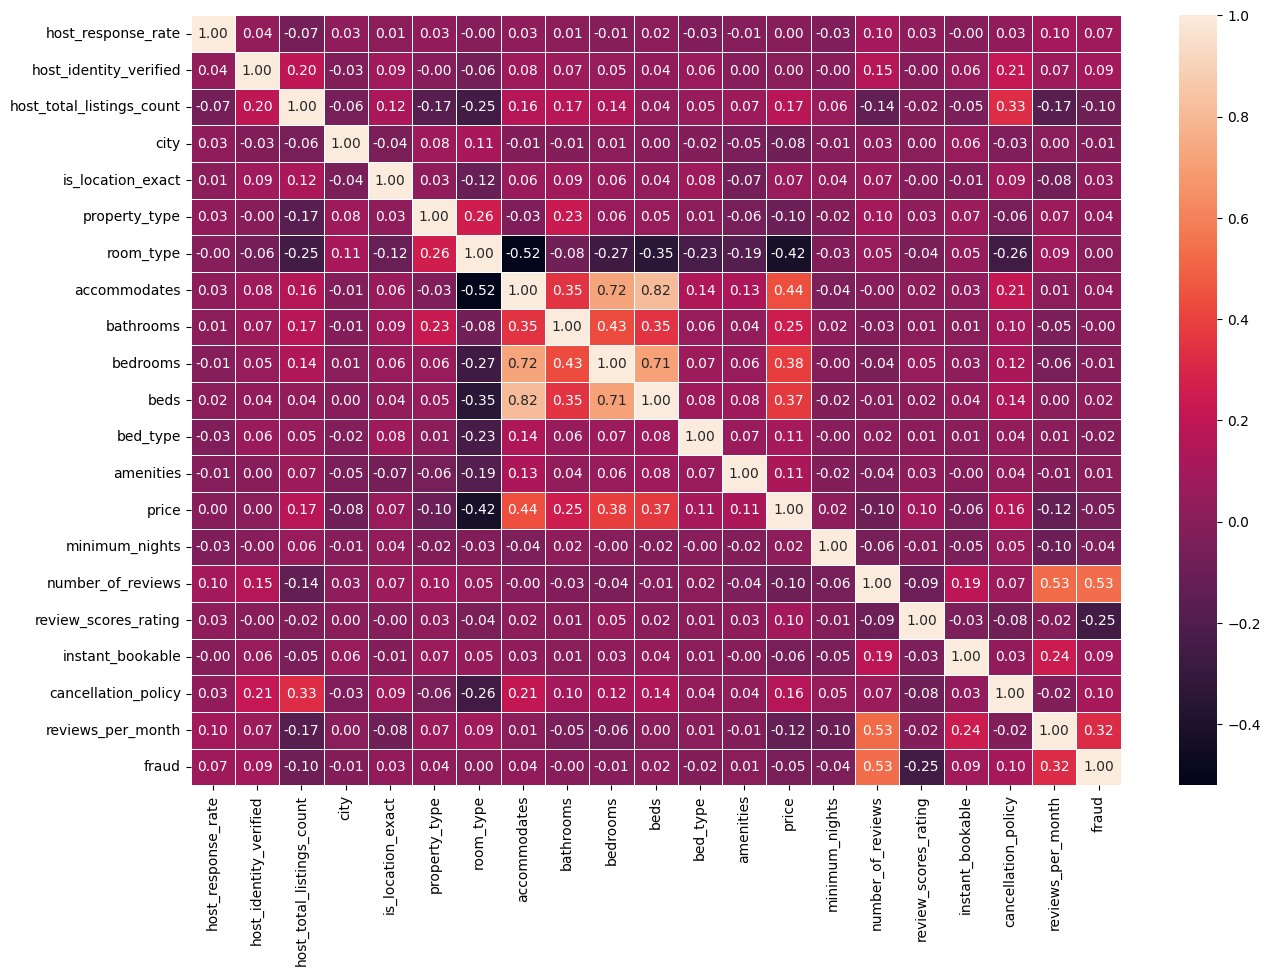

In [18]:
# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f')

# Feature Engineering

Binning Categorical Variables

In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#Bin host_response_rate
df["Bin_host_response_rate"] = pd.cut(df["host_response_rate"], bins=bins, labels=labels, include_lowest=True)
df["Bin_host_response_rate"] = df["Bin_host_response_rate"].astype(int)

#Bin review_scores_rating
df["Bin_review_score_rating"] = pd.cut(df["review_scores_rating"], bins=bins, labels=labels, include_lowest=True)
df["Bin_review_score_rating"] = df["Bin_review_score_rating"].astype(int)

#Bin minimum_nights
df["Bin_Min_Nights"] = df["minimum_nights"].apply(lambda x: 1 if 0 <= x <= 10 else (2 if 11 <= x <= 20 else 3))

#Number of Accomodation: 1-3 accomodataes - 1; 4-6 accomodates - 2; 7 or more accomodates
df["Bin_Num_Accom"] = df["accommodates"].apply(lambda x: 1 if 1 <= x <= 3 else (2 if 4 <= x <= 6 else 3))

#Bin host_total_listings_count
list_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
list_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df["Bin_Ttl_Listings"] = pd.cut(df["host_total_listings_count"], bins=list_bins, labels=list_labels, include_lowest=True)
df["Bin_Ttl_Listings"] = df["Bin_Ttl_Listings"].astype(int)

Log Transformation on Skewed Continuous Data Features

In [20]:
import numpy as np

In [21]:
skewed_features = ['price', 'number_of_reviews', 'city', 'reviews_per_month']

#log1p to add a constant, ensuring that values do not go to infinite
for sk_feat in skewed_features:
  df[f'lg_{sk_feat}'] = np.log1p(df[sk_feat])

# Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
columns_to_keep = [col for col in df.columns if col != 'fraud']
df_wo_labels = df[columns_to_keep]

Create new dataframe with processed features

In [92]:
import itertools
selected_feat = ["host_identity_verified", "is_location_exact", "instant_bookable", "cancellation_policy", "room_type", "property_type", "amenities", "bathrooms", "bedrooms", "beds", "bed_type"]
lg_feat =  ['lg_price', 'lg_number_of_reviews', 'lg_city', 'lg_reviews_per_month']
bin_feat = ["Bin_Min_Nights", "Bin_Num_Accom", "Bin_Ttl_Listings", "Bin_review_score_rating", "Bin_host_response_rate"]
ttl_feat_list =list(itertools.chain(selected_feat, lg_feat,  bin_feat))

In [93]:
processed_df = df[ttl_feat_list].copy()

In [94]:
#categorical data features
cat_feat = list(itertools.chain(selected_feat, bin_feat))
#continuous data features
cont_feat = [col for col in processed_df.columns if col not in cat_feat]

In [95]:
processed_fraud_df = pd.concat([processed_df, df['fraud']], axis = 1)

In [96]:
bef_OHE_train_x, bef_OHE_test_x, bef_OHE_train_y, bef_OHE_test_y = train_test_split(processed_df, df["fraud"], test_size=0.20, random_state=42)

In [97]:
bef_OHE_train_data, bef_OHE_test_data = processed_fraud_df[:len(bef_OHE_train_x)], processed_fraud_df[len(bef_OHE_train_x):]

In [98]:
#OHE
cat_feat = [cat for cat in cat_feat if cat in processed_df]
cat_feat.remove('amenities')
print(cat_feat)
ohe_process_df = pd.get_dummies(processed_df, columns = cat_feat)

['host_identity_verified', 'is_location_exact', 'instant_bookable', 'cancellation_policy', 'room_type', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'Bin_Min_Nights', 'Bin_Num_Accom', 'Bin_Ttl_Listings', 'Bin_review_score_rating', 'Bin_host_response_rate']


In [99]:
scaler = StandardScaler()
for i in ohe_process_df.columns:
    ohe_process_df[i] = scaler.fit_transform(ohe_process_df[[i]])

In [100]:
OHE_train_x, OHE_test_x, OHE_train_y, OHE_test_y = train_test_split(ohe_process_df, df["fraud"], test_size=0.20, random_state=42)

In [194]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [195]:
OHE_train_x_smote, OHE_train_y_smote = smote.fit_resample(OHE_train_x, OHE_train_y)

# NN (Without SMOTE)

In [183]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

X_train_tensor = torch.tensor(OHE_train_x.values)
X_test_tensor = torch.tensor(OHE_test_x.values)
y_train_tensor = torch.tensor(OHE_train_y.values)
y_test_tensor = torch.tensor(OHE_test_y.values)

print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)

torch.Size([2868, 94])
torch.Size([717, 94])
torch.Size([2868])
torch.Size([717])


In [184]:
class ANN(nn.Module):
    def __init__(self, input_dim=94, hidden_dim1=32,hidden_dim2=8,hidden_dim3 =4 , output_dim=2):
        super(ANN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2,hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3,output_dim),
            
        )
        
    def forward(self, x):
        return self.model(x)

In [185]:
model = ANN()

In [186]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

epochs = range(0,5000)
final_loss = []

for i in epochs:
    X_train_tensor = X_train_tensor.float()
    y_pred = model(X_train_tensor)
    y_train_tensor = y_train_tensor.long()  # Convert the target tensor to LongTensor
    loss = criterion(y_pred, y_train_tensor)
    final_loss.append(loss.item())
    
    # if i % 10 == 0:
    #     predicted_labels = torch.argmax(y_pred, dim=1)  # Obtain the predicted labels
    #     accuracy = accuracy_score(y_train_tensor.numpy(), predicted_labels.numpy())
    #     precision = precision_score(y_train_tensor.numpy(), predicted_labels.numpy(), zero_division=1)
    #     recall = recall_score(y_train_tensor.numpy(), predicted_labels.numpy(), zero_division=1)
    #     f1 = f1_score(y_train_tensor.numpy(), predicted_labels.numpy(), zero_division=1)
        
        # print("Epoch number: {} | Loss: {:.4f} | Accuracy: {:.4f} | Precision: {:.4f} | Recall: {:.4f} | F1-Score: {:.4f}".format(i, loss.item(), accuracy, precision, recall, f1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [188]:
y_predict_probs = []
# with torch.no_grad():
#     X_test_tensor = X_test_tensor.float()
#     for data_new in X_test_tensor:
#         y_pred = model.forward(data_new)
#         predicted_class = torch.argmax(y_pred).item()
#         y_predict.append(predicted_class)

with torch.no_grad():
    X_test_tensor = X_test_tensor.float()
    y_test_probs = torch.softmax(model(X_test_tensor), dim=1)
    
    # Assuming that output_dim is 2
    probabilities_class_1 = y_test_probs[:, 1].numpy()
    y_predict_probs.extend(probabilities_class_1)
        

In [189]:
# Choose a threshold for binary classification (e.g., 0.5)
threshold = 0.5
y_predict = [1 if item > threshold else 0 for item in y_predict_probs]

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(OHE_test_y,y_predict)
print(cm)

from sklearn.metrics import classification_report
report = classification_report(OHE_test_y, y_predict)

print(report)

[[517  44]
 [ 61  95]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       561
           1       0.68      0.61      0.64       156

    accuracy                           0.85       717
   macro avg       0.79      0.77      0.78       717
weighted avg       0.85      0.85      0.85       717



In [190]:
#Run accuracy
ml_acc = accuracy_score(OHE_test_y, y_predict)

#Run Pecision Score
ml_precision = precision_score(OHE_test_y, y_predict)

#Run recall Score
ml_recall = recall_score(OHE_test_y,y_predict)

#Run F1 Score
ml_fl_score = f1_score(OHE_test_y,y_predict)

print(ml_acc)
print(ml_precision)
print(ml_recall)
print(ml_fl_score)

0.8535564853556485
0.6834532374100719
0.6089743589743589
0.6440677966101696


In [191]:
from sklearn.metrics import roc_auc_score,ConfusionMatrixDisplay

# Assuming you have the true labels (y_true) and predicted probabilities (y_pred)
auc_score = roc_auc_score(OHE_test_y, y_predict_probs)
auc_score

0.8887746240687419

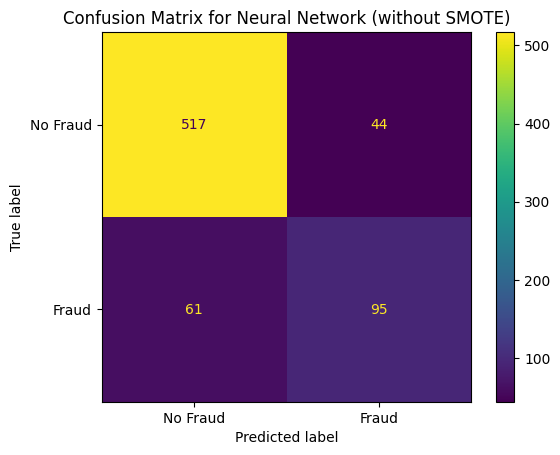

In [192]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Fraud", "Fraud"])
cm_display.plot()
plt.title(f"Confusion Matrix for Neural Network (without SMOTE)")
plt.show()

# NN (With SMOTE)

In [196]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

X_train_tensor_smote = torch.tensor(OHE_train_x_smote.values)
X_test_tensor_smote = torch.tensor(OHE_test_x.values)
y_train_tensor_smote = torch.tensor(OHE_train_y_smote.values)
y_test_tensor_smote = torch.tensor(OHE_test_y.values)

print(X_train_tensor_smote.shape)
print(X_test_tensor_smote.shape)
print(y_train_tensor_smote.shape)
print(y_test_tensor_smote.shape)

torch.Size([4514, 94])
torch.Size([717, 94])
torch.Size([4514])
torch.Size([717])


In [197]:
model = ANN()

In [198]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

epochs = range(0,5000)
final_loss = []

for i in epochs:
    X_train_tensor_smote = X_train_tensor_smote.float()
    y_pred = model(X_train_tensor_smote)
    y_train_tensor_smote = y_train_tensor_smote.long()  # Convert the target tensor to LongTensor
    loss = criterion(y_pred, y_train_tensor_smote)
    final_loss.append(loss.item())
    
    # if i % 10 == 0:
    #     predicted_labels = torch.argmax(y_pred, dim=1)  # Obtain the predicted labels
    #     accuracy = accuracy_score(y_train_tensor_smote.numpy(), predicted_labels.numpy())
    #     precision = precision_score(y_train_tensor_smote.numpy(), predicted_labels.numpy(), zero_division=1)
    #     recall = recall_score(y_train_tensor_smote.numpy(), predicted_labels.numpy(), zero_division=1)
    #     f1 = f1_score(y_train_tensor_smote.numpy(), predicted_labels.numpy(), zero_division=1)
        
    #     print("Epoch number: {} | Loss: {:.4f} | Accuracy: {:.4f} | Precision: {:.4f} | Recall: {:.4f} | F1-Score: {:.4f}".format(i, loss.item(), accuracy, precision, recall, f1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [200]:
y_predict_probs = []
# with torch.no_grad():
#     X_test_tensor = X_test_tensor.float()
#     for data_new in X_test_tensor:
#         y_pred = model.forward(data_new)
#         predicted_class = torch.argmax(y_pred).item()
#         y_predict.append(predicted_class)

with torch.no_grad():
    X_test_tensor = X_test_tensor.float()
    y_test_probs = torch.softmax(model(X_test_tensor), dim=1)
    
    # Assuming that output_dim is 2
    probabilities_class_1 = y_test_probs[:, 1].numpy()
    y_predict_probs.extend(probabilities_class_1)
        

In [201]:
# Choose a threshold for binary classification (e.g., 0.5)
threshold = 0.5
y_predict = [1 if item > threshold else 0 for item in y_predict_probs]

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(OHE_test_y,y_predict)
print(cm)

from sklearn.metrics import classification_report
report = classification_report(OHE_test_y, y_predict)

print(report)

[[464  97]
 [ 39 117]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       561
           1       0.55      0.75      0.63       156

    accuracy                           0.81       717
   macro avg       0.73      0.79      0.75       717
weighted avg       0.84      0.81      0.82       717



In [205]:
#Run accuracy
ml_acc = accuracy_score(OHE_test_y, y_predict)

#Run Pecision Score
ml_precision = precision_score(OHE_test_y, y_predict)

#Run recall Score
ml_recall = recall_score(OHE_test_y,y_predict)

#Run F1 Score
ml_fl_score = f1_score(OHE_test_y,y_predict)

print(ml_acc)
print(ml_precision)
print(ml_recall)
print(ml_fl_score)

0.810320781032078
0.5467289719626168
0.75
0.6324324324324323


In [203]:
from sklearn.metrics import roc_auc_score,ConfusionMatrixDisplay

# Assuming you have the true labels (y_true) and predicted probabilities (y_pred)
auc_score = roc_auc_score(OHE_test_y, y_predict_probs)
auc_score

0.8730060788884318

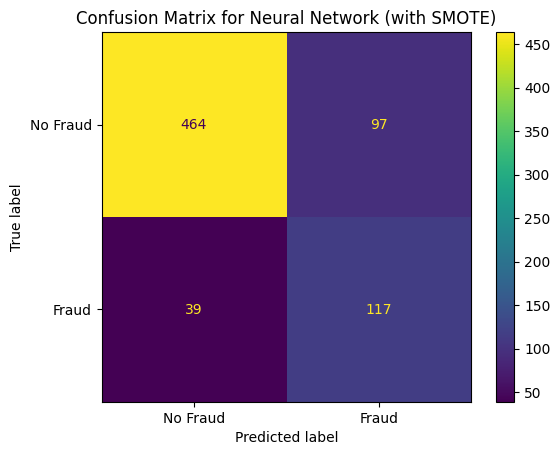

In [204]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Fraud", "Fraud"])
cm_display.plot()
plt.title(f"Confusion Matrix for Neural Network (with SMOTE)")
plt.show()

# Feature Selection on Training Data: bef_OHE_train_data

#### Wrapper Method Feature Selection (Bi-directional Feature Elimination)

In [32]:
# pip install mlxtend

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10)

In [35]:
import numpy as np
from sklearn import model_selection
cross_v =  model_selection.ShuffleSplit(n_splits = 10, test_size = 0.2, train_size = 0.8, random_state = 42)

In [36]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(rfc,
         k_features=(5,len(ttl_feat_list)),
         forward=True,
         floating=True,
         cv=cross_v)

In [37]:
sffs.fit(bef_OHE_train_x, bef_OHE_train_y)
sffs_ttl_feat = list(sffs.k_feature_names_)

# Train-Test Split

In [38]:
#Bi-directional Feature Selection
bidir_fs_processed_df = processed_df[sffs_ttl_feat]

In [39]:
#Bidirectional Feature Selection OHE
bidirect_cat_feat = [cat for cat in cat_feat if cat in bidir_fs_processed_df]
ohe_bidir_process_df = pd.get_dummies(bidir_fs_processed_df, columns = bidirect_cat_feat)

In [40]:
#Train Test Split for Bidirectional Feature Selection
bidir_train_x, bidir_test_x, bidir_train_y, bidir_test_y = train_test_split(ohe_bidir_process_df, df["fraud"], test_size=0.20, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the bidir_train_x data and transform it
bidir_x_processed_train_scaled = scaler.fit_transform(bidir_train_x)
# Transform bidir_test_x using the same scaler
bidir_x_processed_test_scaled = scaler.transform(bidir_test_x)

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
bidir_train_x_smote, bidir_train_y_smote = smote.fit_resample(bidir_train_x, bidir_train_y)

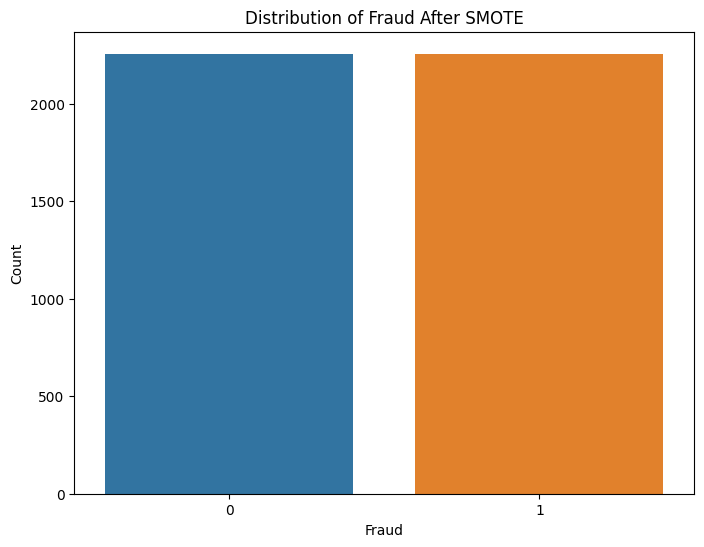

In [45]:
# Plot the new distribution of fraud after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=bidir_train_y_smote)
plt.title("Distribution of Fraud After SMOTE")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.show()

In [46]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the bidir_train_x data and transform it
bidir_x_smote_train_scaled = scaler.fit_transform(bidir_train_x_smote)
# Transform bidir_test_x using the same scaler
bidir_x_smote_test_scaled = scaler.transform(bidir_test_x)

# Machine Learning Models (Without SMOTE)

Keep KNN, SVC, RandomForest, GradientBoostingClassifier, Neural Network (Deep Learning), run the confusionMatrix for these 5 models and evaluate in report.

In [ ]:
from sklearn import ensemble, gaussian_process, linear_model, neighbors, svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(random_state = 42),
    ensemble.RandomForestClassifier(random_state = 42),

    #Logistic Regression
    linear_model.LogisticRegressionCV(random_state = 42),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier()

    ]

In [ ]:
bidir_processed_mla_columns = ["Model Name", "Model Parameters", "Bidir_Accuracy_Processed"]
bidir_processed_MLA_Results = pd.DataFrame(columns = bidir_processed_mla_columns)

In [ ]:
row_index = 0

for model in MLA:
  #model name
  model_name = model.__class__.__name__
  #model param
  model_param = str(model.get_params())
  #old data
  model.fit(bidir_x_processed_train_scaled, bidir_train_y)
  model_acc = accuracy_score(model.predict(bidir_x_processed_test_scaled), bidir_test_y)
  bidir_processed_MLA_Results.loc[row_index] = {"Model Name": model_name, "Model Parameters": model_param, "Bidir_Accuracy_Processed": model_acc}
  row_index += 1

#Dataframe
bidir_processed_MLA_Results.sort_values(by= "Bidir_Accuracy_Processed")

,Model Name,Model Parameters,Bidir_Accuracy_Processed
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.828452
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.836820
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.846583
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.853556


In [ ]:
bidir_processed_MLA_Results["Bidir_Accuracy_Processed"].mean()

0.8413528591352859

In [ ]:
# from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning (Without SMOTE)

In [ ]:
bs_n_estimator = [10, 50, 100, 200]
bs_ratio = [0.1, 0.25, 0.5, 0.75, 1.0]
bs_learn = [0.01, .03, .05, 0.1, 0.25]
bs_max_depth = [2, 4, 6, 8, 10]
bs_min_samp = [5, 10, .03, .05, .10]
bs_criterion = ['gini', 'entropy']
bs_bool = [True, False]
bs_seed = [42]
bs_neighbour = [1,3,5,7,9]
bs_weights = ['uniform', 'distance']

bs_param = [
    #AdaBoostClassifier Parameters
    [{
        'n_estimators': bs_n_estimator,
        'learning_rate': bs_learn,
        'random_state': bs_seed
    }],
    #Random Forest Parameters
    [{
        'n_estimators': bs_n_estimator,
        'criterion': bs_criterion,
        'oob_score': [True],
        'random_state': bs_seed,
        'max_depth': bs_max_depth
      }],
     #LogisticRegression Parameters
    [{
        'fit_intercept': bs_bool,
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'random_state': bs_seed
    }],
    # #Linear SVC Parameters
    #   [{
    #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #       'C': [1,2,3,4,5], #default=1.0
    #       'gamma': bs_ratio, #edfault: auto
    #       'decision_function_shape': ['ovo', 'ovr'], #default:ovr
    #       'probability': [True],
    #       'random_state': bs_seed
    #   }],
     #K Nearest Neighbours Parameters
    [{
        'n_neighbors': bs_neighbour,
        'weights': bs_weights,
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "metric": ["minkowski", "euclidean", "manhattan"]
    }]
]

In [ ]:
for ml_model, ml_param in zip(MLA, bs_param):

  bs_search = GridSearchCV(estimator = ml_model, param_grid = ml_param, scoring = 'accuracy')
  #Fit train data on bayes_best search
  model_best_search = bs_search.fit(bidir_x_processed_train_scaled, bidir_train_y)
  #Get best search parameters
  model_best_param = model_best_search.best_params_
  #Print out the best parameter for the model
  print(f"The best parameter for {ml_model.__class__.__name__} is {model_best_param}")
  #set parameter for the model
  ml_model.set_params(**model_best_param)
  print("-"*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}
----------
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200, 'oob_score': True, 'random_state': 42}
----------
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 42, 'solver': 'liblinear'}
----------
The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
----------


# Model Evaluation (Without SMOTE)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [ ]:
#Create DataFrame
column_names = ["Model_Name", "Accuracy", "Precion_Score", "Recall_Score", "F1_Score", "ROC_Score"]
evaluation_df = pd.DataFrame(columns = column_names)

In [ ]:
row_index = 0
for ml_model in MLA:
    #model name
    model_name = ml_model.__class__.__name__
    print(model_name)
    print(ml_model.get_params())
    #set parameters
    # ml_model.set_params(**best_param)
    #make prediction
    ml_y_pred = ml_model.predict(bidir_x_processed_test_scaled)
    #Run accuracy
    ml_acc = accuracy_score(bidir_test_y, ml_y_pred)
    #Run Pecision Score
    ml_precision = precision_score(bidir_test_y, ml_y_pred)
    #Run recall Score
    ml_recall = recall_score(bidir_test_y, ml_y_pred)
    #Run F1 Score
    ml_fl_score = f1_score(bidir_test_y, ml_y_pred)
    #ROC Score
    ml_ROC_Score = roc_auc_score(bidir_test_y, ml_y_pred)
    evaluation_df.loc[row_index] = {"Model_Name": model_name, "Accuracy": ml_acc, "Precion_Score": ml_precision, "Recall_Score": ml_recall, "F1_Score": ml_fl_score, \
                                    "ROC_Score": ml_ROC_Score}
    row_index += 1
evaluation_df

AdaBoostClassifier
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}
RandomForestClassifier
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
LogisticRegressionCV
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'refit': True, 'scoring': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0}
KNeighborsClassifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None,

,Model_Name,Accuracy,Precion_Score,Recall_Score,F1_Score,ROC_Score
0,AdaBoostClassifier,0.846583,0.666667,0.589744,0.625850,0.753874
1,RandomForestClassifier,0.828452,0.632000,0.506410,0.562278,0.712207
2,LogisticRegressionCV,0.853556,0.707317,0.557692,0.623656,0.746761
3,KNeighborsClassifier,0.838215,0.669492,0.506410,0.576642,0.718446


In [ ]:
evaluation_df["Accuracy"].mean()

0.8417015341701535

In [ ]:
sffs_ttl_feat

['cancellation_policy',
 'bed_type',
 'lg_number_of_reviews',
 'lg_reviews_per_month',
 'Bin_Num_Accom',
 'Bin_host_response_rate']

# Machine Learning Models (With SMOTE)

In [ ]:
smote_MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(random_state = 42),
    ensemble.RandomForestClassifier(random_state = 42),

    #Logistic Regression
    linear_model.LogisticRegressionCV(random_state = 42),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier()
    ]

In [ ]:
bidir_smote_mla_columns = ["Model Name", "Model Parameters", "Bidir_Accuracy_Processed_SMOTE"]
bidir_smote_MLA_Results = pd.DataFrame(columns = bidir_smote_mla_columns)

In [ ]:
row_index = 0

for model in smote_MLA:
  #model name
  model_name = model.__class__.__name__
  #model param
  model_param = str(model.get_params())
  #old data
  model.fit(bidir_x_smote_train_scaled, bidir_train_y_smote)
  model_acc = accuracy_score(model.predict(bidir_x_smote_test_scaled), bidir_test_y)
  bidir_smote_MLA_Results.loc[row_index] = {"Model Name": model_name, "Model Parameters": model_param, "Bidir_Accuracy_Processed_SMOTE": model_acc}
  row_index += 1

#Dataframe
bidir_smote_MLA_Results.sort_values(by= "Bidir_Accuracy_Processed_SMOTE")

,Model Name,Model Parameters,Bidir_Accuracy_Processed_SMOTE
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.781032
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.800558
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.804742
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.807531


In [ ]:
bidir_smote_MLA_Results["Bidir_Accuracy_Processed_SMOTE"].mean()

0.798465829846583

# Hyperparameter Tuning (With SMOTE)

With SMOTE

In [ ]:
for ml_model, ml_param in zip(smote_MLA, bs_param):

  bs_search = GridSearchCV(estimator = ml_model, param_grid = ml_param, cv=3, scoring = 'accuracy')
  #Fit train data on bayes_best search
  model_best_search = bs_search.fit(bidir_x_smote_train_scaled, bidir_train_y_smote)
  #Get best search parameters
  model_best_param = model_best_search.best_params_
  #Print out the best parameter for the model
  print(f"The best parameter for {ml_model.__class__.__name__} is {model_best_param}")
  #set parameter for the model
  ml_model.set_params(**model_best_param)
  print("-"*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 42}
----------
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200, 'oob_score': True, 'random_state': 42}
----------
The best parameter for LogisticRegressionCV is {'fit_intercept': False, 'random_state': 42, 'solver': 'sag'}
----------
The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
----------


# Model Evaluation (With SMOTE)

In [ ]:
column_names = ["Model_Name", "Accuracy", "Precion_Score", "Recall_Score", "F1_Score", "ROC_Score"]
w_smote_evaluation_df = pd.DataFrame(columns = column_names)
row_index = 0
for ml_model in smote_MLA:
    #model name
    model_name = ml_model.__class__.__name__
    print(model_name)
    print(ml_model.get_params())
    #make prediction
    ml_y_pred = ml_model.predict(bidir_x_smote_test_scaled)
    #Run accuracy
    ml_acc = accuracy_score(bidir_test_y, ml_y_pred)
    #Run Pecision Score
    ml_precision = precision_score(bidir_test_y, ml_y_pred)
    #Run recall Score
    ml_recall = recall_score(bidir_test_y, ml_y_pred)
    #Run F1 Score
    ml_fl_score = f1_score(bidir_test_y, ml_y_pred)
    #ROC Score
    ml_ROC_Score = roc_auc_score(bidir_test_y, ml_y_pred)
    w_smote_evaluation_df.loc[row_index] = {"Model_Name": model_name, "Accuracy": ml_acc, "Precion_Score": ml_precision, "Recall_Score": ml_recall, "F1_Score": ml_fl_score, \
                                            "ROC_Score": ml_ROC_Score}
    row_index += 1
w_smote_evaluation_df

AdaBoostClassifier
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 42}
RandomForestClassifier
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
LogisticRegressionCV
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'refit': True, 'scoring': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0}
KNeighborsClassifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_

,Model_Name,Accuracy,Precion_Score,Recall_Score,F1_Score,ROC_Score
0,AdaBoostClassifier,0.804742,0.533058,0.826923,0.648241,0.812749
1,RandomForestClassifier,0.800558,0.535135,0.634615,0.580645,0.740659
2,LogisticRegressionCV,0.807531,0.538136,0.814103,0.647959,0.809903
3,KNeighborsClassifier,0.788006,0.509615,0.679487,0.582418,0.748834


In [ ]:
w_smote_evaluation_df["Accuracy"].mean()

0.8002092050209204

# Deep Learning